# EDA on titanic dataset with logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

In [40]:
train = pd.read_csv('titanic_train.csv')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
train.shape

(891, 12)

In [43]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

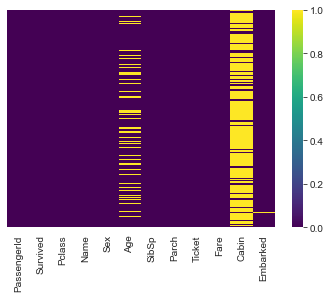

In [44]:
sns.heatmap(train.isnull(),yticklabels = False,cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

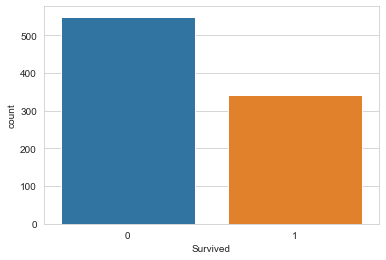

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

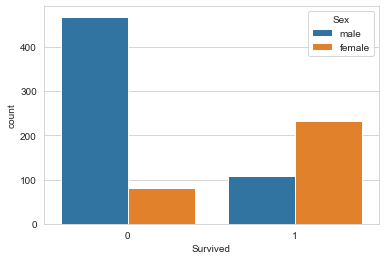

In [46]:
sns.countplot(x='Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

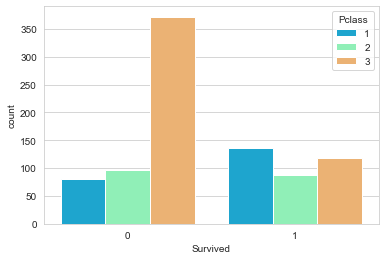

In [47]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette = 'rainbow')

C:\Users\owais\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

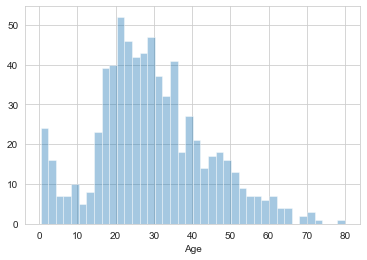

In [48]:
sns.distplot(train['Age'].dropna(),kde =False,bins = 40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

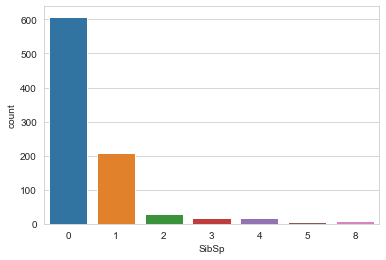

In [49]:
sns.countplot(x='SibSp',data = train)

<AxesSubplot:>

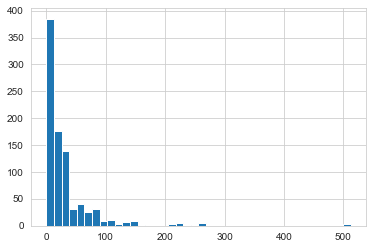

In [50]:
train['Fare'].hist(bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

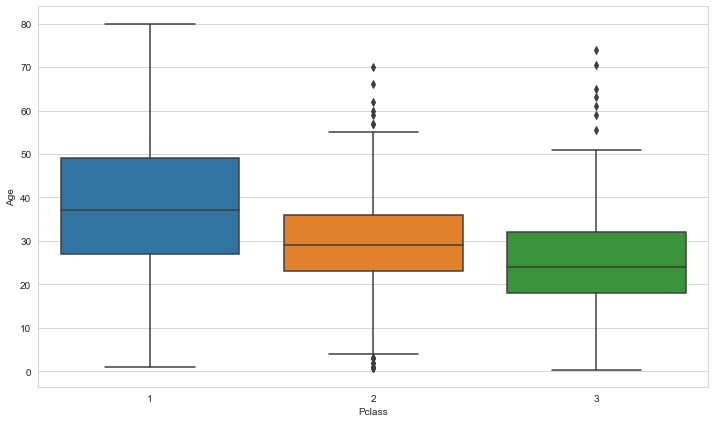

In [51]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data = train)

## replacing age null values with values in it

In [55]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [56]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

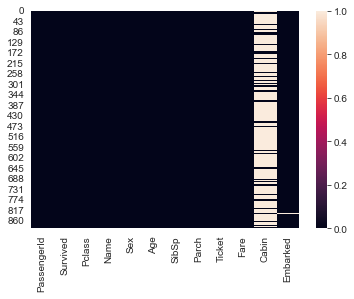

In [57]:
sns.heatmap(train.isnull())

In [58]:
train.drop('Cabin',axis = 1 , inplace= True)

<AxesSubplot:>

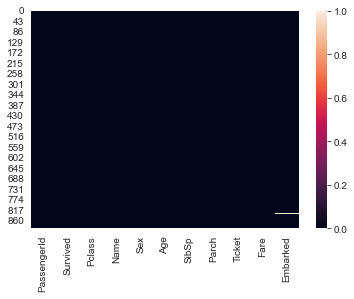

In [59]:
sns.heatmap(train.isnull())

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


## Using dummies to replace values

In [62]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [67]:
train.drop(['Sex','Name','Ticket','Embarked'],axis = 1,inplace=True)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24.0,1,0,7.2500
1,2,1,1,37.0,1,0,71.2833
2,3,1,3,24.0,0,0,7.9250
3,4,1,1,37.0,1,0,53.1000
4,5,0,3,24.0,0,0,8.0500


In [69]:
train = pd.concat([train,sex,embarked],axis = 1)

In [70]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1


In [77]:
X = train.drop('Survived',axis=1)

In [78]:
y = train['Survived']

In [79]:
X,y

(     PassengerId  Pclass   Age  SibSp  Parch     Fare  male  Q  S
 0              1       3  24.0      1      0   7.2500     1  0  1
 1              2       1  37.0      1      0  71.2833     0  0  0
 2              3       3  24.0      0      0   7.9250     0  0  1
 3              4       1  37.0      1      0  53.1000     0  0  1
 4              5       3  24.0      0      0   8.0500     1  0  1
 ..           ...     ...   ...    ...    ...      ...   ... .. ..
 886          887       2  29.0      0      0  13.0000     1  0  1
 887          888       1  37.0      0      0  30.0000     0  0  1
 888          889       3  24.0      1      2  23.4500     0  0  1
 889          890       1  37.0      0      0  30.0000     1  0  0
 890          891       3  24.0      0      0   7.7500     1  1  0
 
 [891 rows x 9 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

## Applying logistic regression

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train,y_train)

C:\Users\owais\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
prediction = lgmodel.predict(X_test)

In [91]:
prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [93]:
accuracy = confusion_matrix(y_test,prediction)


In [94]:
accuracy

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [97]:
accuracy = accuracy_score(y_test,prediction)
accuracy

0.7761194029850746

### EDA with different approach

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [6]:
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [7]:
def describe_count_feature(feature):
    print('results for {}'.format(feature))
    print(df.groupby('Survived')[feature].describe())
    print(ttest(feature))

def ttest(feature):
    survived = df[df['Survived']==1][feature]
    not_survived = df[df['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-stats:  {:.1f},p-value: {:.3f}' . format(tstat,pval))

In [8]:

for feature in ['Pclass','Age','SibSp','Parch','Fare']:
    describe_count_feature(feature)

results for Pclass
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-stats:  -10.3,p-value: 0.000
None
results for Age
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-stats:  nan,p-value: nan
None
results for SibSp
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-stats:  -1.2,p-value: 0.233
None
results for Parch
          count      mean       std  min  25%  50%  75%  max
Survi

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\owais\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


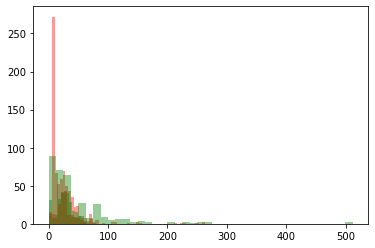

In [9]:
for i in ['Age','Fare']:
    died = list(df[df['Survived']==0][i].dropna())
    survived = list(df[df['Survived']==1][i].dropna())
    sns.distplot(died,color = 'r',kde=False)
    sns.distplot(survived,color='g',kde=False)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
for col in df.columns:
    print('{} = {}'.format(col,df[col].nunique()))

PassengerId = 891
Survived = 2
Pclass = 3
Name = 891
Sex = 2
Age = 88
SibSp = 7
Parch = 7
Ticket = 681
Fare = 248
Cabin = 147
Embarked = 3


In [12]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


<AxesSubplot:xlabel='Survived', ylabel='count'>

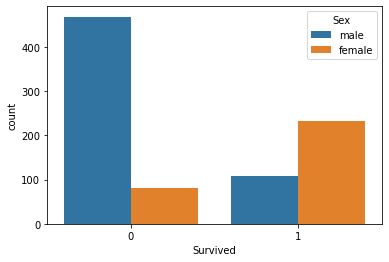

In [13]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [14]:
for col in ['Survived','Sex','Embarked']:
    print(df.groupby(col).mean())

          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                                                 
0          447.016393  2.531876  30.626179  0.553734  0.329690  22.117887
1          444.368421  1.950292  28.343690  0.473684  0.464912  48.395408
        PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Sex                                                                      
female   431.028662  0.742038  2.159236  27.915709  0.694268  0.649682   
male     454.147314  0.188908  2.389948  30.726645  0.429809  0.235702   

             Fare  
Sex                
female  44.479818  
male    25.523893  
          PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Embarked                                                                   
C          445.357143  0.553571  1.886905  30.814769  0.386905  0.363095   
Q          417.896104  0.389610  2.909091  28.089286  0.428571  0.168831   
S          449.527950  

In [16]:
df.groupby(df['Cabin'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#creating new featire form text based columns
df['Title_raw'] = df['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
df['Title'] = df['Title_raw'].apply(lambda x : x if x in ['Master','Miss','Mr','Mrs'] else 'Other')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_raw,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


In [17]:
df.pivot_table(values = ['Survived'],index=['Title','Sex'],aggfunc=['mean','count'])

mean    count
               Survived Survived
Title  Sex                      
Master male    0.575000       40
Miss   female  0.697802      182
Mr     male    0.156673      517
Mrs    female  0.792000      125
Other  female  1.000000        7
       male    0.250000       20

<AxesSubplot:xlabel='Survived', ylabel='count'>

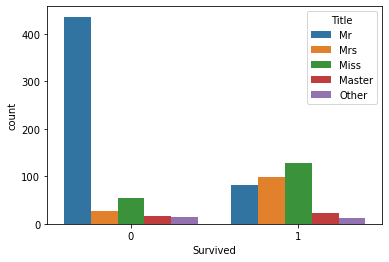

In [18]:
sns.countplot(x='Survived',hue='Title',data=df)

In [19]:
df.groupby(df['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [20]:
#creating indicator varaibles for Cabin
df['Cabin_isna'] = np.where(df['Cabin'].isnull(),0,1)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_raw,Title,Cabin_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0


In [22]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_isna
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.482075
Cabin_isna,0.019919,0.316912,-0.725541,0.249732,-0.040460,0.036987,0.482075,1.000000


### removing nulls


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title_raw        0
Title            0
Cabin_isna       0
dtype: int64

In [24]:
df.groupby(df['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_isna
Age,,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.259104
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.107345


In [25]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_raw,Title,Cabin_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0


In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title_raw        0
Title            0
Cabin_isna       0
dtype: int64

In [28]:
df['Embarked'] = df['Embarked'].fillna('O')

### removing outliers

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_isna
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [30]:
def detect_outliers(features):
    outliers = []
    data = df[features]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y-mean)/std
        if np.abs(z_score > 3):
            outliers.append(y)
    print('outliers: {}'.format(features))
    print('--95p: {:.1f} / {} values exceeds that'.format(data.quantile(.95),len([i for i in data if i > data.quantile(.95)])))
    print(' --3p: {:.1f}'.format(mean + 3*(std),len(outliers)))
    print('--99p: {:.1f}/ {} values exceeds that'.format(data.quantile(.99),len([i for i in data if i > data.quantile(.99)])))

In [31]:
for col in ['Age','Pclass','Parch','Fare']:
    detect_outliers(col)

outliers: Age
--95p: 54.0 / 42 values exceeds that
 --3p: 68.7
--99p: 65.0/ 8 values exceeds that
outliers: Pclass
--95p: 3.0 / 0 values exceeds that
 --3p: 4.8
--99p: 3.0/ 0 values exceeds that
outliers: Parch
--95p: 2.0 / 15 values exceeds that
 --3p: 2.8
--99p: 4.0/ 6 values exceeds that
outliers: Fare
--95p: 112.1 / 45 values exceeds that
 --3p: 181.2
--99p: 249.0/ 9 values exceeds that


In [32]:
#removing outliers by capping the data
df['Age_clean'] = df['Age'].clip(upper=df['Age'].quantile(.99))
df['Fare_clean'] = df['Fare'].clip(upper=df['Fare'].quantile(.99))

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_isna,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956,29.640195,31.224767
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.420397,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,22.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,29.699118,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,65.000000,249.006220


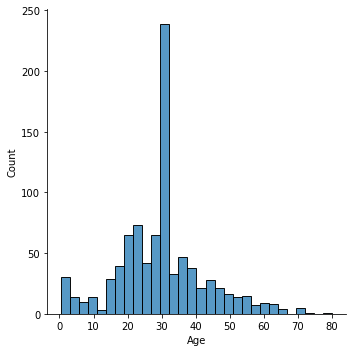

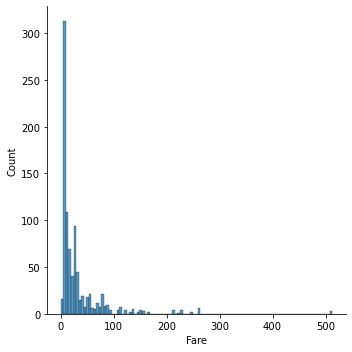

In [34]:
for col in ['Age','Fare']:
    sns.displot(df[col],kde=False)

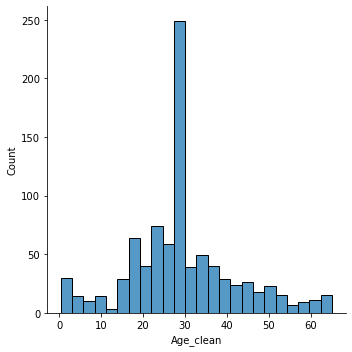

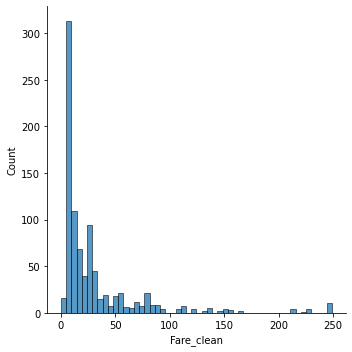

In [38]:
for col in ['Age_clean','Fare_clean']:
    sns.displot(df[col],kde=False)

In [40]:
#tails are long and lots of spikes in fare graph to reduce that we are gonna use box-cox transformations

### box-cox power transformations

Process
1. determine what range of exponents to test
2. Apply each tranformation to each value of your chose feature
3. Use some criteria to determine which of the transfromations yield teh best distributions

C:\Users\owais\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\owais\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\owais\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\owais\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

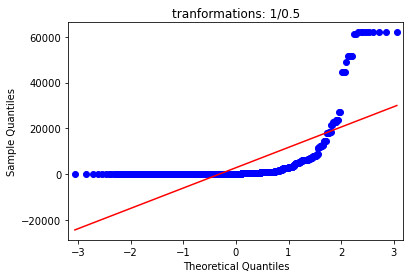

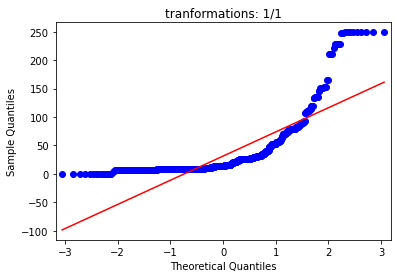

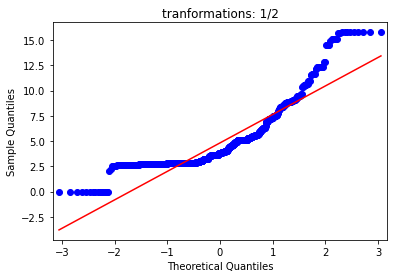

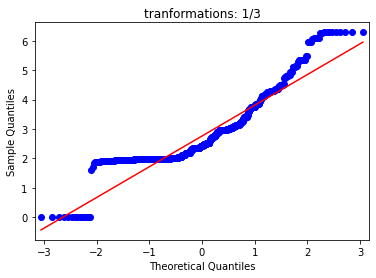

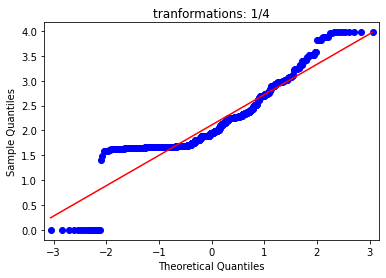

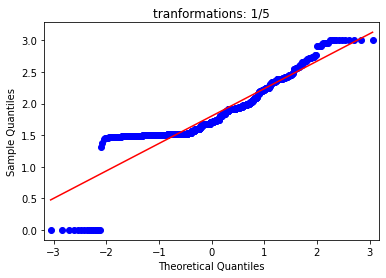

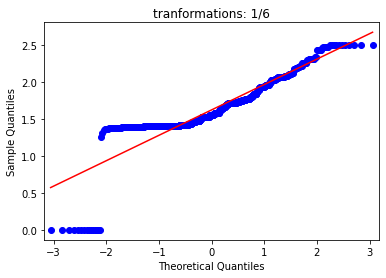

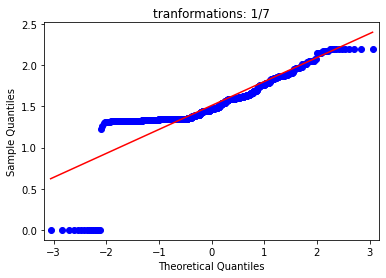

In [35]:
import scipy.stats
for i in [0.5,1,2,3,4,5,6,7]:
    data_t = df['Fare_clean']**(1/i)
    qqplot(data_t,line='s')
    plt.title("tranformations: 1/{}".format(str(i)))

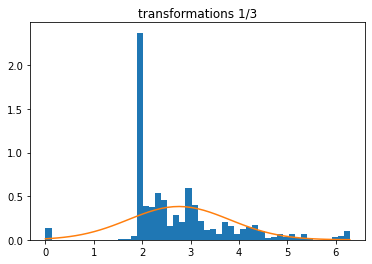

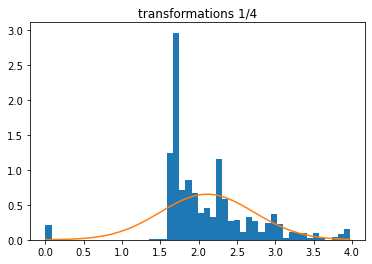

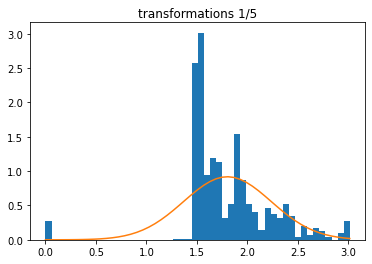

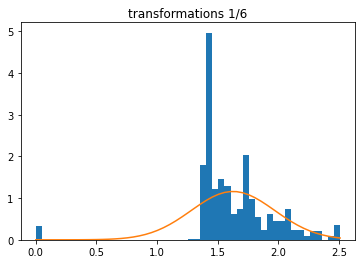

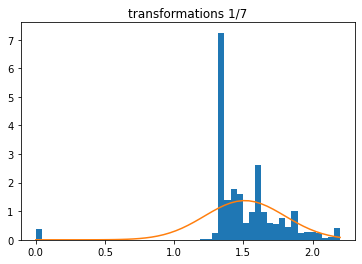

In [50]:
import scipy.stats
for i in [3,4,5,6,7]:
    data_t = df['Fare_clean']**(1/i)
    n,bins,patches = plt.hist(data_t,50,density=True)
    mu = np.mean(data_t)
    std = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins,mu,std))
    plt.title("transformations 1/{}".format(str(i)))
    plt.show()

In [36]:
df['Fare_clean_tr'] = df['Fare_clean'].apply(lambda x: x**(1/5))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_raw,Title,Cabin_isna,Age_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0,22.0,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1,38.0,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,26.0,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1,35.0,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,35.0,8.0500,1.517606


### label encoders

In [37]:
from sklearn.preprocessing import LabelEncoder

for col in ['Sex','Cabin','Embarked','Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_raw,Title,Cabin_isna,Age_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,3,Mr,2,0,22.0,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,Mrs,3,1,38.0,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,3,Miss,1,0,26.0,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3,Mrs,3,1,35.0,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,3,Mr,2,0,35.0,8.0500,1.517606


### train and test data

In [209]:
data_clean = df.copy()

In [210]:
data_clean['Family_cnt'] = data_clean['SibSp'] + data_clean['Parch']

In [211]:
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_raw,Title,Cabin_isna,Age_clean,Fare_clean,Fare_clean_tr,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,3,Mr,2,0,22.0,7.2500,1.486167,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,Mrs,3,1,38.0,71.2833,2.347457,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,3,Miss,1,0,26.0,7.9250,1.512864,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3,Mrs,3,1,35.0,53.1000,2.213191,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,3,Mr,2,0,35.0,8.0500,1.517606,0


In [212]:
x = data_clean.drop(['PassengerId','Survived','Name','Age','Ticket','Fare','Cabin','Title_raw'],axis = 1)

In [213]:
x.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Cabin_isna,Age_clean,Fare_clean,Fare_clean_tr,Family_cnt
0,3,1,1,0,3,2,0,22.0,7.2500,1.486167,1
1,1,0,1,0,0,3,1,38.0,71.2833,2.347457,1
2,3,0,0,0,3,1,0,26.0,7.9250,1.512864,0
3,1,0,1,0,3,3,1,35.0,53.1000,2.213191,1
4,3,1,0,0,3,2,0,35.0,8.0500,1.517606,0


<AxesSubplot:>

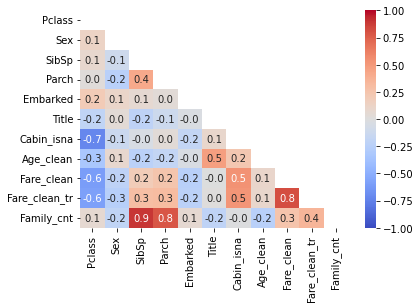

In [214]:
matrix = np.triu(x.corr())
sns.heatmap(x.corr(),annot=True,fmt ='.1f',vmin=-1,vmax=1,center=0,cmap='coolwarm',mask=matrix)

In [215]:
y = data_clean['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [216]:
from sklearn.model_selection import train_test_split

In [217]:
#test set
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.4)

In [218]:
#validation set
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [219]:
X_train.shape,X_val.shape,y_train.shape

((534, 11), (178, 11), (534,))

In [220]:
y_train.head()

570    1
787    0
74     1
113    0
635    1
Name: Survived, dtype: int64

In [221]:
##from sklearn.preprocessing import StandardScaler

In [222]:
#scaler = StandardScaler()
#scaler.fit(X_train)


In [223]:
#features = X_train.columns

#X_train[features] = scaler.transform(X_train[features])
#X_train.head()

In [224]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [225]:
def print_result(results):
    print ('best params: {}'.format(results.best_params_))
    print('best score: {}'.format(results.best_score_))
    
    mean = results.cv_results_['mean_test_score']
    std = results.cv_results_['std_test_score']
    for mean,std,params in zip(mean,std,results.cv_results_['params']):
        print(' {} +/-{} for {}'.format(round(mean, 3),round(std*2,3), params))

In [232]:
%%time
rf = RandomForestClassifier()
parameters = {
    'n_estimators' : [2**i for i in range(3,10)],
    'max_depth':[2,4,8,16,32,None]
}

cv = GridSearchCV(rf,parameters,cv=5)
cv.fit(x,y.values.ravel())

print_result(cv)

best params: {'max_depth': 8, 'n_estimators': 256}
best score: 0.8350072186303434
 0.768 +/-0.072 for {'max_depth': 2, 'n_estimators': 8}
 0.797 +/-0.03 for {'max_depth': 2, 'n_estimators': 16}
 0.783 +/-0.071 for {'max_depth': 2, 'n_estimators': 32}
 0.782 +/-0.065 for {'max_depth': 2, 'n_estimators': 64}
 0.787 +/-0.069 for {'max_depth': 2, 'n_estimators': 128}
 0.783 +/-0.069 for {'max_depth': 2, 'n_estimators': 256}
 0.792 +/-0.053 for {'max_depth': 2, 'n_estimators': 512}
 0.804 +/-0.084 for {'max_depth': 4, 'n_estimators': 8}
 0.809 +/-0.047 for {'max_depth': 4, 'n_estimators': 16}
 0.819 +/-0.036 for {'max_depth': 4, 'n_estimators': 32}
 0.823 +/-0.033 for {'max_depth': 4, 'n_estimators': 64}
 0.822 +/-0.031 for {'max_depth': 4, 'n_estimators': 128}
 0.827 +/-0.033 for {'max_depth': 4, 'n_estimators': 256}
 0.82 +/-0.034 for {'max_depth': 4, 'n_estimators': 512}
 0.828 +/-0.066 for {'max_depth': 8, 'n_estimators': 8}
 0.819 +/-0.051 for {'max_depth': 8, 'n_estimators': 16}
 0.82

In [233]:
from time import time
from sklearn.metrics import accuracy_score,precision_score,recall_score

def evaluate_model(features,labels):
    start = time()
    pred = cv.predict(features)
    end = time()
    
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    print('accuracy : {} / precision : {} / recall : {} / time: {}'.format(accuracy,precision,recall,round((end-start)*1000,1)))

In [234]:
evaluate_model(X_train,y_train)
evaluate_model(X_val,y_val)
evaluate_model(X_test,y_test)

accuracy : 0.921 / precision : 0.949 / recall : 0.836 / time: 31.4
accuracy : 0.916 / precision : 0.931 / recall : 0.831 / time: 22.0
accuracy : 0.894 / precision : 0.925 / recall : 0.816 / time: 21.9
